In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [ ]:
base_csv = '/content/nepal.csv'
df = pd.read_csv(base_csv, header = None)
df


,0,1,2,3
0,0,GENERAL,जोगाउन को लागि,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...
1,1,GENERAL,लखेटनु पछ,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...
2,1,GENERAL,ससकृती ध्वस्त पार्ने,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !
3,1,GENERAL,भुमाफिया,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...
4,1,GENERAL,बेची सके,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...
...,...,...,...,...
4030,0,FEEDBACK,कार्वाही हुनुपर्छ,गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...
4031,0,FEEDBACK,आवश्यक छ,गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...
4032,0,FEEDBACK,कम हुन्छ,कम से कम वायु प्रदूषण त कम हुन्छ ।
4033,0,FEEDBACK,लानु पर्छ,अब यसरी नै अन्य बस हरु थप्दै लानु पर्छ ।


In [ ]:
df = df.rename(columns = { 0:'reaction'})

In [ ]:
df.loc[(df['reaction'] == 0), 'reaction'] = 'negative'

In [ ]:
df.loc[(df['reaction'] == 1), 'reaction'] = 'positive'

In [ ]:
df

,reaction,1,2,3
0,negative,GENERAL,जोगाउन को लागि,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...
1,positive,GENERAL,लखेटनु पछ,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...
2,positive,GENERAL,ससकृती ध्वस्त पार्ने,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !
3,positive,GENERAL,भुमाफिया,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...
4,positive,GENERAL,बेची सके,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...
...,...,...,...,...
4030,negative,FEEDBACK,कार्वाही हुनुपर्छ,गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...
4031,negative,FEEDBACK,आवश्यक छ,गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...
4032,negative,FEEDBACK,कम हुन्छ,कम से कम वायु प्रदूषण त कम हुन्छ ।
4033,negative,FEEDBACK,लानु पर्छ,अब यसरी नै अन्य बस हरु थप्दै लानु पर्छ ।


In [ ]:
df['join']= df[2]+' '+ df[3]

In [ ]:
df

,reaction,1,2,3,join
0,negative,GENERAL,जोगाउन को लागि,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...,जोगाउन को लागि गुठी विधेक ल्याएर ठमेल मा राज ग...
1,positive,GENERAL,लखेटनु पछ,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...,लखेटनु पछ दले ले देश सकेछन सबै बेचे र खान सुरू...
2,positive,GENERAL,ससकृती ध्वस्त पार्ने,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !,ससकृती ध्वस्त पार्ने नेपाल को ससकृती ध्वस्त पा...
3,positive,GENERAL,भुमाफिया,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...,भुमाफिया मठ मन्दिर गुम्बा का जग्गा हरु मा भुमा...
4,positive,GENERAL,बेची सके,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...,बेची सके नेपाल का कल कर्खाना र नदि नाला बेची स...
...,...,...,...,...,...
4030,negative,FEEDBACK,कार्वाही हुनुपर्छ,गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...,कार्वाही हुनुपर्छ गाडी एकदम राम्रो छ तर रोड भन...
4031,negative,FEEDBACK,आवश्यक छ,गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...,आवश्यक छ गाडी एकदम राम्रो छ तर रोड भने आलु जस्...
4032,negative,FEEDBACK,कम हुन्छ,कम से कम वायु प्रदूषण त कम हुन्छ ।,कम हुन्छ कम से कम वायु प्रदूषण त कम हुन्छ ।
4033,negative,FEEDBACK,लानु पर्छ,अब यसरी नै अन्य बस हरु थप्दै लानु पर्छ ।,लानु पर्छ अब यसरी नै अन्य बस हरु थप्दै लानु पर...


In [ ]:
X,y = df['join'].values,df['reaction'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (3026,)
shape of test data is (1009,)


In [ ]:
x_train

array(['सिके हुने नमस्कार रबी सर साथै दिकप सर जे गरे पनी देश को क़ानून छैन रबि सर बाट सिके हुने नी सधै देखाउड़I पनी लाज छैन हाम्रो देश का नेता हरू यो सेटिंग लाई छोडेर काम MA लगने भय देश बन्ने थियो रबी सर हरू को बयान गरेर पनी सकीदैन ।',
       'खाते राजा आउनु पर्\u200dयो यी सबै भ्रष्टचारी लाई ठुलो खोर बनाएर भित्र्याउनु पर्\u200dयो खाते हरु लाई ।',
       'आउनु पर्छ हिन्दू राष्ट्र सहित राजतन्त्र आउनु पर्छ ।', ...,
       'शू शूभ कामना आगामी दिन मा हजूर को कार्यक्रम सफलता को शू शूभ कामना यहि नै मेरो तर्फ बाट ।',
       'राम्रो योजाना राम्रो योजाना हरु छन रबिन्द्र मिश्र सङ्ग रहेछन मनपर्यो ।',
       'बड़ाऊनु होला धेरै धेरै बधाई छ रवि सर तपाई लाई अब झन अड़ीग अनी ज़िम्मेवार भएर कार्यक्रम लाई आगड़ी बड़ाऊनु होला ।'],
      dtype=object)

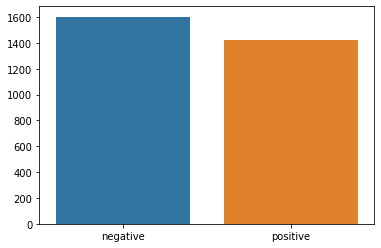

In [ ]:
dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['negative','positive']),y=dd.values)
plt.show()

In [ ]:
import snowballstemmer
import time
stop_words = [] 
with open('non-potential-topic-word-list.txt', 'r', encoding="utf8") as reader:
    for line in reader:
        line = line.strip('\n')
        stop_words.append(line)
stemmer = snowballstemmer.NepaliStemmer()
def content_filter(df_all_content):
        df['content_list'] = df_all_content.apply(tokenizer)
        df['join'] =  df['content_list'].apply(lambda x: " ".join(x))

def tokenizer(text): 
      tokenized_word = []
      stopwords = set(stop_words)
      stem_list = stemmer.stemWords(text.split())
      tokenized_word = list(filter(word_filter, stem_list))
        # final_tokenized_word = [word for word in tokenized_word if len(word)>3]

      return tokenized_word

def word_filter(stem_word):
        nepali_word = True
        # print('stem_word: ',stem_word)
        if len(stem_word) > 3:
            for letter in stem_word:
                if not 0x0090 <= ord(letter) <= 0x97F:
                    nepali_word = False
                return nepali_word 
        else:
            return False 


In [ ]:
for sent in x_train:
    for word in sent.lower().split():
          word = preprocess_string(word)
          if word not in stop_words and word != '':
              word_list.append(word)


array(['सरापेकाे सरापेकाे', 'दिमाग जनता धेरै माहाचोर साला दिमाग जनता',
       'सोच्नी सुर्य सरकार कमिकमजोरी टिप्प आलोचना सरकार होशियारी गराउ राजाबा देख् सरकार कामकारबाही सुधार ल्याउ सोच्नी',
       ..., 'सागर गौतमे जबाफ हजुर', 'हामी करोड नेपाली अखण्ड ढिक् नेपाल',
       'पाठक घांस तलुवा चटुवा बिद्वान बन्न पर्दैन घन्टा गर्छन दिबेश कुरा ख़्याल सकिए तिमि फेरि रेलिंग भांचे'],
      dtype=object)

In [ ]:
x_train

array([list([]), list([]), list([]), ..., list([109]), list([]), list([])],
      dtype=object)

In [ ]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

def word_filter(stem_word):
        nepali_word = True
        # print('stem_word: ',stem_word)
        if len(stem_word) > 3:
            for letter in stem_word:
                if not 0x0090 <= ord(letter) <= 0x97F:
                    nepali_word = False
                return nepali_word 
        else:
            return False    

def tockenize(x_train,y_train,x_val,y_val):
    word_list = []
    tokenized_word = []
    stopwords = set(stop_words)
    for i in x_train:
      stem_list = stemmer.stemWords(i.split())
      tokenized_word = list(filter(word_filter, stem_list))
        # final_tokenized_word = [word for word in tokenized_word if len(word)>3]
      word_list.append(tokenized_word)
    print(word_list)
    a = list(itertools.chain.from_iterable(word_list))
    print(a)
    corpus = Counter(a)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
    
    # tockenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.split() 
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.split() 
                                    if preprocess_string(word) in onehot_dict.keys()])
            
    encoded_train = [1 if label =='positive' else 0 for label in y_train]
    print(encoded_train)  
    encoded_test = [1 if label =='positive' else 0 for label in y_val]
    print(encoded_test)
    return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict

In [ ]:
lst = ['समाज', 'खेलकुद', 'राजनीति', 'प्रवास','विश्व','अर्थ','स्वास्थ्य','विज्ञान प्रविधि','मनोरञ्जन','साहित्य','सेयर बजार']
pat = '|'.join(lst)

df1 = df[df['label'].str.contains(pat)]

In [ ]:
import itertools
a = [['a','b'], ['c']]
c= list(itertools.chain.from_iterable(a))
print(c)

['a', 'b', 'c']


In [ ]:
x_train,y_train,x_test,y_test,vocab = tockenize(x_train,y_train,x_test,y_test)

In [ ]:
encoded_train

NameError: ignored

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
x_train

array([list([]), list([]), list([]), ..., list([]), list([]), list([])],
      dtype=object)

In [ ]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


In [ ]:
print(vocab)

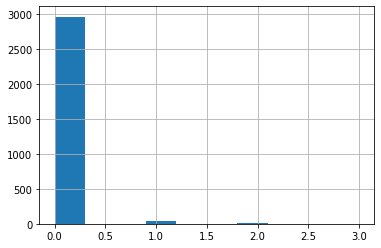

count    3026.000000
mean        0.023794
std         0.182079
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
dtype: float64

In [ ]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [ ]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [ ]:
x_train_pad = padding_(x_train,500)
x_test_pad = padding_(x_test,500)

In [ ]:
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size,drop_last=True)

In [ ]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)


Sample input size:  torch.Size([50, 500])
Sample input: 
 tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
Sample input: 
 tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 1])


In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(SentimentRNN,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size
    
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers,batch_first = True)
        
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
    
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self,x,hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
        
        
        
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [ ]:
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 1
hidden_dim = 256


model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model.to(device)
print(vocab_size)
print(model)

1001
SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
# loss and optimization functions
lr=0.0001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()


In [ ]:
clip = 5
epochs = 20
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model.zero_grad()
        output,h = model(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
 
    
        
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '/content/model.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')
    

Epoch 1
train_loss : 0.6904061992963155 val_loss : 0.6896686643362046
train_accuracy : 53.76734963648381 val_accuracy : 53.716551040634286
Validation loss decreased (inf --> 0.689669).  Saving model ...
Epoch 2
train_loss : 0.6900160680214564 val_loss : 0.688989195227623
train_accuracy : 53.56906807666887 val_accuracy : 53.815659068384534
Validation loss decreased (0.689669 --> 0.688989).  Saving model ...
Epoch 3
train_loss : 0.6890889843304951 val_loss : 0.6884281039237976
train_accuracy : 53.76734963648381 val_accuracy : 53.716551040634286
Validation loss decreased (0.688989 --> 0.688428).  Saving model ...
Epoch 4
train_loss : 0.6882021317879359 val_loss : 0.6879490345716477
train_accuracy : 53.63516192994051 val_accuracy : 53.716551040634286
Validation loss decreased (0.688428 --> 0.687949).  Saving model ...
Epoch 5
train_loss : 0.6880130936702092 val_loss : 0.6863479524850845
train_accuracy : 53.30469266358229 val_accuracy : 53.91476709613479
Validation loss decreased (0.687949 

In [ ]:
def predict_text(text):
        word_seq = np.array([vocab[preprocess_string(word)] for word in text.split() 
                         if preprocess_string(word) in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding_(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        h = model.init_hidden(batch_size)
        h = tuple([each.data for each in h])
        output, h = model(inputs, h)
        return(output.item())

In [ ]:
index = 1
print(df['join'][index])
print('='*70)
print(f'Actual sentiment is  : {df["reaction"][index]}')
print('='*70)
pro = predict_text(df['join'][index])
print(pro)
if pro > 0.5:
  status = "postive"
else:
  status = "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'Predicted sentiment is {status} with a probability of {pro}')

लखेटनु पछ दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब दले लाई लखेटनु पछ ।
Actual sentiment is  : positive
0.5309350490570068
Predicted sentiment is postive with a probability of 0.5309350490570068


In [ ]:
!git init

Initialized empty Git repository in /content/.git/


In [ ]:
!git add sentiment_analysis.ipynb

fatal: pathspec 'sentiment_analysis.ipynb' did not match any files
